# Исследование объявлений о продаже квартир

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка:-вывод" data-toc-modified-id="Предобработка:-вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка: вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Рассчёты:-вывод" data-toc-modified-id="Рассчёты:-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчёты: вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади,-цены,-количества-комнат-и-высоты-потолков" data-toc-modified-id="Анализ-площади,-цены,-количества-комнат-и-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ площади, цены, количества комнат и высоты потолков</a></span></li><li><span><a href="#Анализ-времени-продажи" data-toc-modified-id="Анализ-времени-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ времени продажи</a></span></li><li><span><a href="#Очистка-от-редких-значений" data-toc-modified-id="Очистка-от-редких-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Очистка от редких значений</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Изучение-населенных-пунктов" data-toc-modified-id="Изучение-населенных-пунктов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение населенных пунктов</a></span></li><li><span><a href="#Изучение-центра-Санкт-Петербурга" data-toc-modified-id="Изучение-центра-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение центра Санкт-Петербурга</a></span></li><li><span><a href="#Исследовательский-анализ:-вывод" data-toc-modified-id="Исследовательский-анализ:-вывод-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Исследовательский анализ: вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [2]:
#импортируем данные с разедлителем-табуляцией
data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Поверхностно изучив датасет, мы видим, что в нём присутствуют 23699 строк, но часть данных отсутствует. Больше всего пропусков в столбцах is_apartment и parks_nearest. Если во втором случае мы можем предположить, что неуказанное количество парков означает отсутствие парков поблизости, то определить, является ли недвижимость апартаментом по другим признакам мы не можем. 

Часть пропусков связаны с человеческим фактором заполнения данных о недвижимости (is_apartment, ceiling_height, living_area, balcony), а часть — несовершенством автоматической системы заполнения данных на основе картографии (parks_nearest, airports_nearest, cityCenters_nearest и другие). Пропуские в days_exposition могут быть из-за того, что объявление до сих пор актуально и у него нет конечного срока.

Почти все типы данных, кроме названия города и буллевого is_apartment являются численными (корректными), однако я предлагаю заменить целочисленные столбцы balcony и floors_total на тип int.

## Предобработка данных

In [5]:
#приведём все строки к единому регистру
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)

Если система не нашла парков и водоёмов в пределах 3 километров, я предполагаю, что их нет и мы можем заменить значение на 0. То же самое касается количества балконов.

In [6]:
#заменим значения в некоторых пропусках на нулевые
for value in ('balcony', 'ponds_around3000', 'parks_around3000'):
    data.loc[data[value].isna(), value] = 0

Также проверим пропуски в столбце is_apartment, так как их слишком много.

In [7]:
#проверим, можем ли мы что-то сделать со столбцом is_aparment, какие значения там пропущены
print(f"Количество строк-апартаментов: {data.loc[data['is_apartment'] == True, 'is_apartment'].count()}")
print(f"Количество строк-квартир: {data.loc[data['is_apartment'] == False, 'is_apartment'].count()}")

Количество строк-апартаментов: 50
Количество строк-квартир: 2725


Пропуски в этом столбце не подлежат какой-то логике, поэтому придётся оставить их как есть.

Остальные пропуски не являются критически важными для исследования и не зависят от других значений в строке, поэтому я предлагаю тоже не заменять их на другие значения.

Что касается типов данных, то нам точно нужно привести дату создания объявления к формату datetime, чтобы было проще работать с этим столбцом в дальнейшем. Также заменим тип данных о цене на int, так как там нет дробных значений. Остальные столбцы имеют корректный тип данных.

In [8]:
#изменим тип данных цены на целочисленный и тип столбца времени
data['last_price'] = data['last_price'].astype('int')
data['floor'] = data['floor'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [9]:
#пробуем найти явные дубликаты
data.duplicated().sum()

0

In [10]:
#попробуем найти неявные дубликаты в названиях городов, так как они будут использоваться в исследовании
print(sorted(data['locality_name'].unique().astype(str)))

['nan', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревн

Здесь обнаружились неявные дубликаты, связанные с написанием буквы Ё (посёлок и поселок). Приведём названия к единому стилю написания.

In [11]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [12]:
#попробуем найти неявные дубликаты или аномалии в других столбцах
print(sorted(data['floor'].unique()))
print(sorted(data['rooms'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]


### Предобработка: вывод

В результате предобработки данных мы привели все названия столбцов к единому регистру, заменили некоторые типы данных и выяснили, что в датасете нет дубликатов. В целом, данные не нуждались в серьёзной предобработке.

## Расчёты и добавление результатов в таблицу

Нам этом этапе нам нужно добавить в датасет некоторые новые столбцы, рассчитанные на основе данных других столбцов. Это поможет в проведении дальнейшего исследования.

In [13]:
#добавляем столбцы цены за метр, доли жилой площади и площади кухни
data['meter_price'] = data['last_price'] / data['total_area']
data['living_share'] = data['living_area'] / data['total_area']
data['kitchen_share'] = data['kitchen_area'] / data['total_area']

In [14]:
#создаём функцию для возвращения типа этажа квартиры
def which_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return('first')
    elif floor == floors_total:
        return('last')
    else:
        return('other')

In [15]:
#создаём новый столбец, применяя функцию
data['floor_type'] = data.apply(which_floor, axis = 1)

In [16]:
#вытаскиваем номер дня недели из даты
data['weekday'] = data['first_day_exposition'].dt.dayofweek

#cоздаём функцию по превращению номера дня недели в его название
def weekday_name(row):
    day = row['weekday']
    names = {0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}
    return(names[day])

#создаём столбец с названиями дней недели
data['weekday_name'] = data.apply(weekday_name, axis = 1)

#удаляем столбец с номерами дней недели
del data['weekday']

In [17]:
#создаём столбцы с численными значениями месяца и года публикации
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [18]:
#проверяем, что всё добавилось корректно
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,living_share,kitchen_share,floor_type,weekday_name,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,other,Четверг,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,first,Вторник,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,other,Четверг,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,NaN,NaN,other,Пятница,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,other,Вторник,6,2018


### Рассчёты: вывод

На этом этапе мы создали в таблице 7 новых столбцов: 3 столбца с рассчётами, 1 категорийный и 3 столбца, разбивающих дату публикации объявления на день недели, месяц и год.

## Исследовательский анализ данных

### Анализ площади, цены, количества комнат и высоты потолков
Попробуем построить стандартные гистограммы для столбцов площади квартиры, цены, количества комнат и высоты потолков.

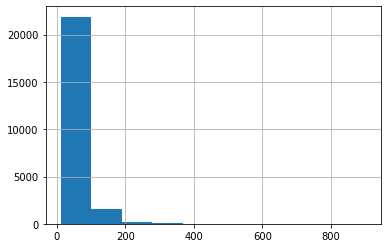

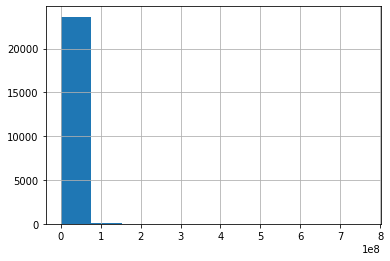

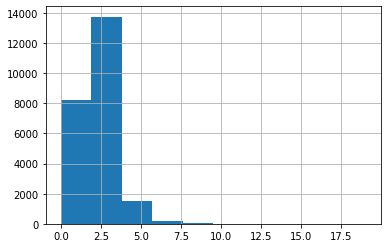

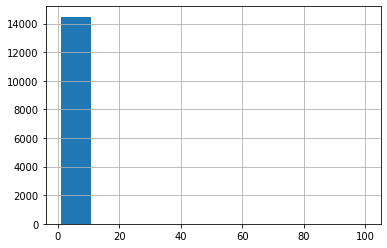

In [19]:
for value in ('total_area', 'last_price', 'rooms', 'ceiling_height'):
    data[value].hist(bins=10)
    plt.show()

На гистограммах из-за выбивающихся значений мы не видим реальную разницу значений на оси X, поэтому создадим такие же гистограммы, но с ограничениями значений.

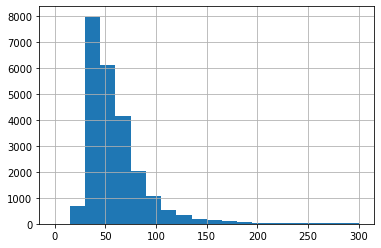

In [20]:
#строим гистограмму площади  для квартир до 300 метров
data['total_area'].hist(range=(0,300), bins = 20)
plt.show()

Теперь график выглядит корректно: пик площади продаваемых квартир приходится примерно на 40-45 метров (двухкомнатная квартира). Есть совсем небольшое число квартир-студий до 30 метров и значительный спад продаж квартир после 50-60 метров. Квартиры, площадью более 200 метров — это скорее исключения, однако это тоже реальные данные и нам нужно их учитывать.

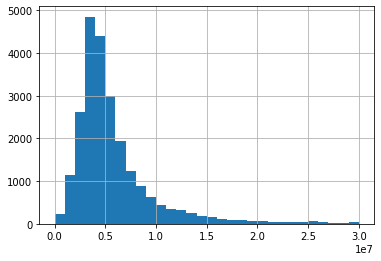

In [21]:
#гистограмма по цене с ограничением в 30 миллионов
data['last_price'].hist(range=(0,30000000), bins=30)
plt.show()

График цены тоже является нормальным распределением: пик количества проданных объектов недвижимости приходится на цену в 4 миллиона рублей. Количество лотов снижается с увеличением цены до 20 млн, а после этого долго не уходит в ноль (очень длинный хвост графика).

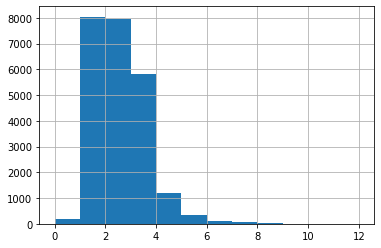

In [22]:
#гистограмма по количеству комнат с ограничением в 12
data['rooms'].hist(bins=12, range=(0,12)) 
plt.show()

График количества комнат проданных объектов недвижимости не похож на нормальное распределение, но является полностью корректным. Количество проданных однокомнатных и двухкомнатных квартир почти одинаково, количество трёхкомнатных — чуть меньше, а затем идёт значительный постепенный спад.

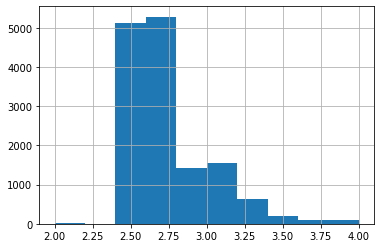

In [23]:
#гистограмма по высоте потолков с ограничением в 4 метра
data['ceiling_height'].hist(range=(2,4)) 
plt.show()

График высоты потолков проданных объектов недвижимости тоже не похож на нормальное распределение, но является корректным. Самыми популярными вариантами стали потолки, высотой 2.4-2.8 метров, но есть небольшой пик на высоте 3.0 - 3.2 метров (возможно, это советские номенклатурные дома).

### Анализ времени продажи

In [24]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Статистическое описание данных вполне корректное. Минимальное время продажи объекта недвижимости — 1 день. Если учитывается только время поиска покупателя без оформления сделки, то такое время может быть реальным. Максимальное время — более 4 лет.

При этом, половина объектов недвижимости продаётся быстрее, чем за 95 дней. От этих цифр будем отталкиваться: если покупатель объекта недвижимости нашёлся менее, чем за 45 дней (Q1) — то это быстрая сделка, если дольше 232 дней (Q3), то это долгая сделка.

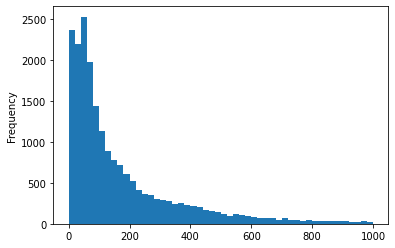

In [25]:
data['days_exposition'].plot(kind='hist', bins=50, range=(0,1000))
plt.show()

На гистограмме это выглядит как распределение Пуассона, с непонятными двумя пиками в начале и очень длинным хвостом.

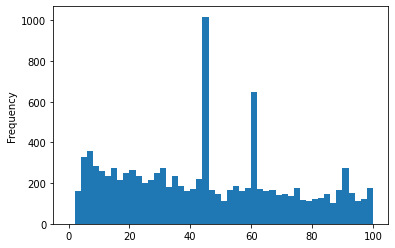

In [26]:
#посмотрим подробнее на пики
data['days_exposition'].plot(kind='hist', bins=50, range=(0,100))
plt.show()

Эти пики находятся на 45 и 60-ом дне. Нужно их проверить.

In [27]:
#посмотрим на другие характеристики квартир из этих пиков
data.query('(days_exposition == 45) or (days_exposition == 60)').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,living_share,kitchen_share,month,year
count,538.000000,5.380000e+02,538.000000,538.000000,274.000000,538.000000,350.000000,538.000000,359.000000,538.000000,...,538.000000,184.000000,538.000000,231.000000,538.0,538.000000,350.000000,359.000000,538.000000,538.000000
mean,9.128253,6.025421e+06,60.541097,2.157993,2.728321,13.059480,34.385857,6.990706,10.830084,0.605948,...,0.453532,514.690217,0.626394,532.199134,60.0,102655.353287,0.564612,0.188465,6.550186,2017.578067
std,5.782229,1.679605e+06,17.415049,0.881816,0.242156,7.096842,13.357023,5.274752,3.919244,0.953735,...,0.718651,354.811667,0.854286,267.689460,0.0,25051.648566,0.107095,0.070071,3.746916,0.697456
min,0.000000,1.200000e+06,23.000000,0.000000,2.500000,1.000000,8.500000,1.000000,4.800000,0.000000,...,0.000000,13.000000,0.000000,35.000000,60.0,27385.159011,0.240793,0.075758,1.000000,2016.000000
25%,5.000000,4.900000e+06,48.000000,2.000000,2.600000,7.000000,23.000000,3.000000,8.100000,0.000000,...,0.000000,321.750000,0.000000,350.500000,60.0,84877.730884,0.500000,0.137784,3.000000,2017.000000
50%,9.000000,5.776000e+06,59.000000,2.000000,2.700000,12.000000,33.000000,5.000000,10.000000,0.000000,...,0.000000,460.500000,0.000000,510.000000,60.0,100253.378378,0.575622,0.172911,7.000000,2018.000000
75%,13.000000,6.950000e+06,72.000000,3.000000,2.800000,17.750000,44.000000,10.000000,12.345000,1.000000,...,1.000000,646.000000,1.000000,723.000000,60.0,115952.205882,0.632261,0.228604,10.000000,2018.000000
max,32.000000,1.390000e+07,132.000000,6.000000,4.190000,27.000000,78.000000,25.000000,30.000000,5.000000,...,3.000000,2295.000000,3.000000,1219.000000,60.0,210176.991150,0.927562,0.500000,12.000000,2019.000000


Странно, но кроме одинакового времени продажи эти квартиры больше ничего не объединяет.

### Очистка от редких значений

Чтобы найти явные выборосы, мы можем воспользоваться методом describe, примененным на всю таблицу.

In [28]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,living_share,kitchen_share,month,year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,21796.000000,21421.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,0.564766,0.187355,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,0.105368,0.072968,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.021583,0.025381,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,0.495177,0.133333,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,0.567860,0.172414,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,0.637880,0.232416,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,1.000000,0.787879,12.000000,2019.000000


Теперь я опишу диапазон значений столбцов и отмечу подозрительные.

Количество изображений: от 0 до 50.

Цена: От 23000❓ до 760 млн

Площадь: от 12 до 900

Количество комнат: от 0❓ до 19

Высота потолка: от 1❓ до 100 метров❓

Количество этажей: от 1 до 60❓

Этаж: от 1 до 33

Количество балконов: от 0 до 5

Количество парков рядом: от 1 до 3

Количество водоёмов рядом: от 0 до 3

Время продажи (поиска покупателя): от 1 до 1580

Цена за метр: от 23000 до 1900000❓

Доля кухни: от 2.5% до 75%❓

Жилая доля: от 2%❓ до 100%❓

Теперь мы последовательно будем проверять срезы подозрительных данных на гистограммах и обновлять переменную clear_data.

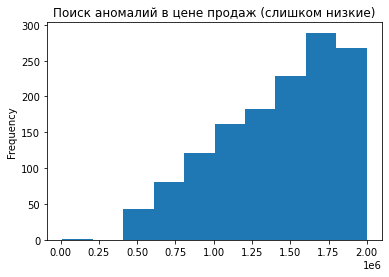

In [29]:
data.query('last_price < 2000000')['last_price'].plot(kind='hist', title='Поиск аномалий в цене продаж (слишком низкие)')
plt.show()

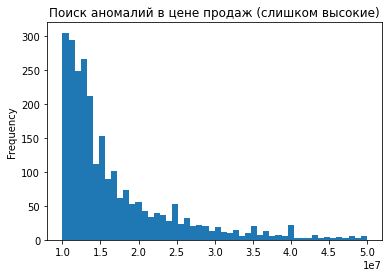

In [30]:
data.query(('last_price > 10000000 and last_price < 50000000'))['last_price'].plot(kind='hist', title='Поиск аномалий в цене продаж (слишком высокие)', bins = 50)
plt.show()                                         
                                         

In [31]:
clear_data = data.loc[data['last_price'] > 400000]
clear_data = data.loc[data['last_price'] < 42000000]
#clear_data = clear_data.loc[data['rooms'] >= 1]

<AxesSubplot:title={'center':'Поиск аномалий в высоте потолка'}, ylabel='Frequency'>

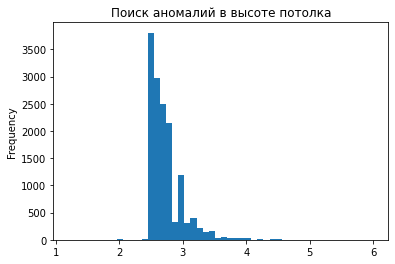

In [32]:
data.query('(ceiling_height > 1) and (ceiling_height < 7)')['ceiling_height'].plot(bins=50, kind='hist', title='Поиск аномалий в высоте потолка')

In [33]:
#clear_data = clear_data.loc[data['ceiling_height'] > 2.3] #минимальная разрешенная высота потолка в РФ — 2,4 метра
#clear_data = clear_data.loc[data['ceiling_height'] < 5]

<AxesSubplot:title={'center':'Поиск аномалий в количестве этажей'}, ylabel='Frequency'>

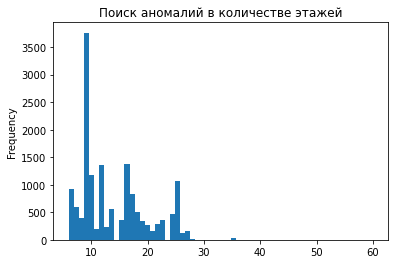

In [34]:
data.query('floors_total > 5')['floors_total'].plot(kind='hist', title='Поиск аномалий в количестве этажей', bins=60)

In [35]:
clear_data = clear_data.loc[data['floors_total'] <= 37]  #самое высокое жилое здание Спб

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Комментарий ревьювера</b> 
    
👍

<AxesSubplot:title={'center':'Поиск аномалий в цене квадратного метра'}, ylabel='Frequency'>

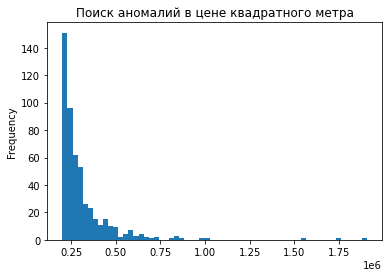

In [36]:
data.query('meter_price > 200000')['meter_price'].plot(kind='hist', title='Поиск аномалий в цене квадратного метра', bins=60)

На графике видно, что после цены в 1 млн. рублей / метр, значения начинаются с большим отрывом, а значения до 1млн. идут достаточно кучно. Поэтому будем считать выбросами строки с ценой за метр выше 1 млн.

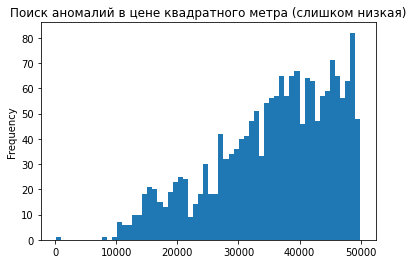

In [37]:
data.query('meter_price < 50000')['meter_price'].plot(kind='hist', title='Поиск аномалий в цене квадратного метра (слишком низкая)', bins=60)
plt.show()


In [38]:
clear_data = clear_data.loc[data['meter_price'] <= 1000000]
clear_data = clear_data.loc[data['meter_price'] >= 10000]

Строки с ценой за метр ниже 10000 — единичные, считаем их выбросами.

<AxesSubplot:title={'center':'Поиск аномалий в доле кухни'}, ylabel='Frequency'>

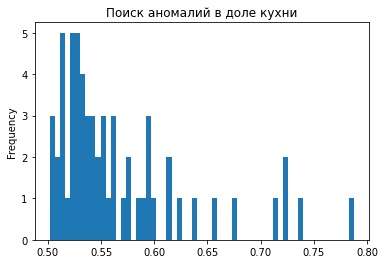

In [39]:
data.query('kitchen_share > 0.5')['kitchen_share'].plot(kind='hist', title='Поиск аномалий в доле кухни', bins=60)

Странно, но недвижимость с такой долей кухни действительно есть. Проверим, что это за квартиры.

In [40]:
data.query('kitchen_share > 0.5').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,living_share,kitchen_share,floor_type,weekday_name,month,year
511,7,5950000,69.00,2017-12-21,1,NaN,16.0,13.00,12,NaN,...,0.0,NaN,56.0,86231.884058,0.188406,0.724638,other,Четверг,12,2017
680,14,7200000,43.00,2017-10-31,1,NaN,8.0,9.00,2,NaN,...,1.0,933.0,296.0,167441.860465,0.209302,0.534884,other,Вторник,10,2017
696,1,3364930,34.69,2014-11-27,1,2.64,25.0,23.43,25,NaN,...,0.0,NaN,574.0,97000.000000,0.675411,0.675411,last,Четверг,11,2014
1326,8,8100000,52.00,2017-01-29,2,2.70,25.0,9.00,15,NaN,...,1.0,1180.0,337.0,155769.230769,0.173077,0.615385,other,Воскресенье,1,2017
1336,12,18500000,66.00,2017-06-08,1,3.00,7.0,25.00,7,NaN,...,0.0,NaN,130.0,280303.030303,0.378788,0.530303,last,Четверг,6,2017
1407,9,3250000,24.60,2018-06-29,1,NaN,25.0,18.00,16,NaN,...,1.0,400.0,96.0,132113.821138,0.731707,0.739837,other,Пятница,6,2018
2309,10,4200000,62.40,2017-06-15,2,2.60,9.0,8.40,6,NaN,...,0.0,NaN,111.0,67307.692308,0.134615,0.657051,other,Четверг,6,2017
2443,18,15000000,72.00,2016-04-25,2,3.66,5.0,21.30,5,NaN,...,1.0,267.0,85.0,208333.333333,0.295833,0.525000,last,Понедельник,4,2016
3290,13,3400000,42.30,2017-01-24,1,2.70,20.0,11.90,3,NaN,...,0.0,NaN,14.0,80378.250591,0.281324,0.517730,other,Вторник,1,2017
3561,5,12300000,115.00,2017-08-09,3,2.70,20.0,45.00,16,NaN,...,0.0,NaN,63.0,106956.521739,0.391304,0.521739,other,Среда,8,2017


Выглядит всё логично, поэтому я не буду отсекать квартиры по этому признаку.

<AxesSubplot:title={'center':'Поиск аномалий в жилой доле'}, ylabel='Frequency'>

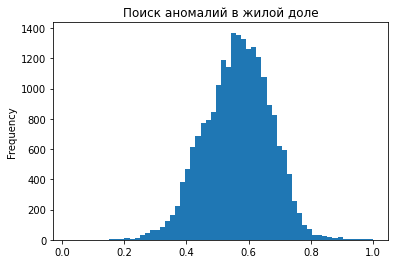

In [41]:
data['living_share'].plot(kind='hist', title='Поиск аномалий в жилой доле', bins=60)

И тут всё похоже на нормальное распределение, поэтому не трогаю эти столбцы.

In [42]:
print(f'Количиство значений до обработки: {len(data)}')
print(f'Количиство значений после обработки: {len(clear_data)}')
print(f'Доля удалённых строк: {1 - len(clear_data) / len(data):2%}')



Количиство значений до обработки: 23699
Количиство значений после обработки: 23431
Доля удалённых строк: 1.130849%


### Факторы, влияющие на стоимость квартиры

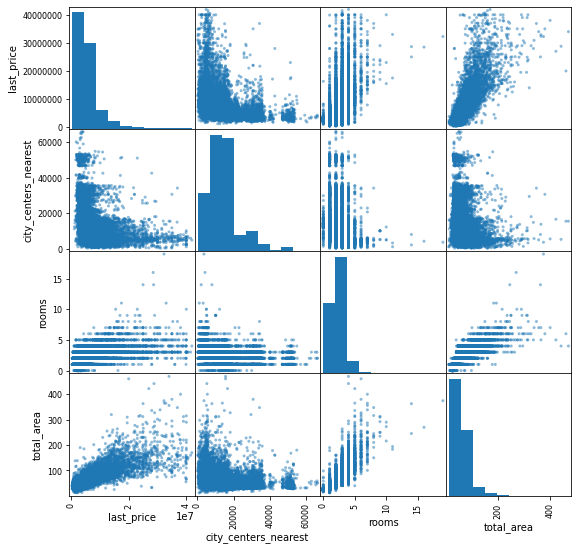

In [43]:
#составим графики зависимости цены квартиры от близости к центру, количества комнат и площади
corr_df = clear_data[['last_price', 'city_centers_nearest', 'rooms', 'total_area']]
pd.plotting.scatter_matrix(corr_df, figsize=(9, 9))
plt.show()

In [44]:
print(corr_df.corr())

                      last_price  city_centers_nearest     rooms  total_area
last_price              1.000000             -0.336855  0.517655    0.786057
city_centers_nearest   -0.336855              1.000000 -0.170689   -0.221597
rooms                   0.517655             -0.170689  1.000000    0.787628
total_area              0.786057             -0.221597  0.787628    1.000000


Чтобы посмотреть зависисимость цены от разных факторов, мы можем изучить нижнюю строку этой матрицы или численные значения корреляции. 

В численных значениях мы видим, что сильная корреляция есть только у цены и площади квартиры (больще площадь = больше цена), чуть меньшая корреляция с колиеством комнат и совсем незначительная обратная корреляция с расстоянием до центра города. Это хорошо видно и на графиках (значения стремятся из нижнего левого угла к верхнему правому). 

Что касается корреляции с расстоянием до центра города, на графике мы видим, что значения с самой высокой ценой на графике расположены близко к центру города. Однако на протяжении всей выборки эта связь очень незначительная.


<AxesSubplot:title={'center':'Зависимость цены от месяца'}, xlabel='Месяцы'>

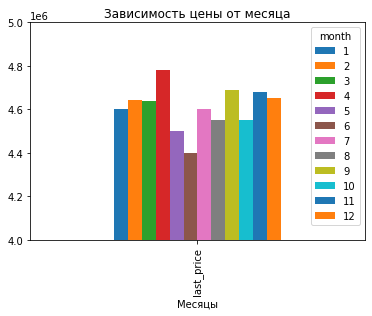

In [80]:
#создаём сводную таблицу с медианными значениями цены по каждому месяцу
pivot_month = clear_data.pivot_table(columns='month', values='last_price', aggfunc='median')
pivot_month.plot(ylim=(4000000,5000000), kind='bar', legend=True, title='Зависимость цены от месяца', xlabel='Месяцы', ylabel='')

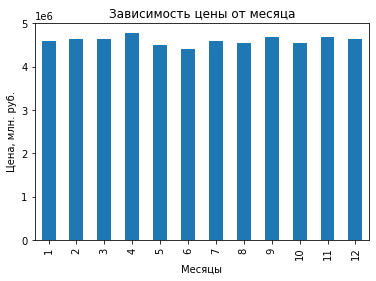

In [83]:
#создаём сводную таблицу с медианными значениями цены по каждому месяцу
pivot_month = clear_data.pivot_table(index='month', values='last_price', aggfunc='median').reset_index()
pivot_month.plot(x='month', kind='bar', title='Зависимость цены от месяца', xlabel='Месяцы', ylabel='Цена, млн. руб.', legend=False)
plt.show()

По этому графику видно, что летом цены на недвижимость становятся чуть ниже, чем в остальные месяцы, но разница незначительна.

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}>

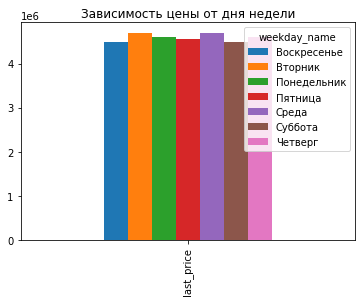

In [46]:
pivot_day = clear_data.pivot_table(columns='weekday_name', values='last_price', aggfunc='median')
pivot_day.plot(kind='bar', title='Зависимость цены от дня недели')

А зависимости цены от дня недели публикации объявления вообще нет.

<AxesSubplot:title={'center':'Зависимость цены от года'}>

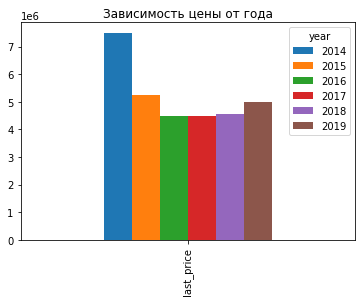

In [47]:
pivot_year = clear_data.pivot_table(columns='year', values='last_price', aggfunc='median')
pivot_year.plot(kind='bar', title='Зависимость цены от года')

По этому графику видно, что цены на квартиры в 2014 году были самыми высокими, а потом их ожидал сильный спад. И только в 2019 году у цен на квартиры положительная динамика.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}>

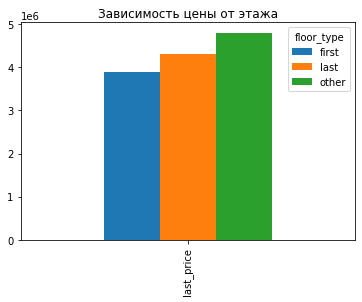

In [48]:
pivot_floor = clear_data.pivot_table(columns='floor_type', values='last_price', aggfunc='median')
pivot_floor.plot(kind='bar', title='Зависимость цены от этажа')

На первых этажах квартиры обычно дешевле, чем на других этажах. Квартиры на последнем этаже почему-то тоже оказались чуть дешевле, чем квартиры на других этажах.

### Изучение населенных пунктов

In [49]:
pivot_city = clear_data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'median', 'min', 'max']) #строим таблицу с количеством недвижимости в разных городах и их медианной ценой
pivot_city.columns = ['count', 'median', 'min', 'max'] #избавляемся от двойного наименования
pivot_city = pivot_city.sort_values(by='count', ascending=False) #сортируем по убыванию количества записей

pivot_city_median = pivot_city.sort_values(by='median', ascending=False) #создаём таблицу с сортировкой по медианной цене
pivot_city_max = pivot_city.sort_values(by='max', ascending=False) #создаём таблицу с сортировкой по максимальной
pivot_city_min = pivot_city.sort_values(by='min', ascending=False) #создаём таблицу с сортировкой по минимальной цене

In [50]:
pivot_city.head(10)

,count,median,min,max
locality_name,,,,
Санкт-Петербург,15473,104444.444444,15345.268542,848484.848485
поселок Мурино,552,86059.293995,50000.000000,138580.246914
поселок Шушары,439,76829.268293,47700.416089,147826.086957
Всеволожск,398,65789.473684,31400.000000,640422.350472
Пушкин,368,99993.589744,59836.065574,256521.739130
Колпино,338,74723.748474,47957.371226,125000.000000
поселок Парголово,327,91642.857143,39205.955335,138522.427441
Гатчина,307,67796.610169,10507.246377,146315.789474
деревня Кудрово,299,91860.465116,54160.346696,142857.142857


Больше всего недвижимости продавалось в Санкт-Петербурге, причём разница с другими городами области — более, чем в 30 раз.

In [51]:
pivot_city_median.head(10)

,count,median,min,max
locality_name,,,,
Санкт-Петербург,15473,104444.444444,15345.268542,848484.848485
Зеленогорск,24,101666.666667,53303.720155,323943.661972
Кудрово,171,100000.000000,68518.518519,160401.002506
Пушкин,368,99993.589744,59836.065574,256521.739130
Сестрорецк,183,99678.456592,50434.782609,182688.172043
поселок Левашово,1,96997.690531,96997.690531,96997.690531
деревня Кудрово,299,91860.465116,54160.346696,142857.142857
поселок Парголово,327,91642.857143,39205.955335,138522.427441
Мурино,34,91478.394974,54964.750866,120448.179272


In [52]:
pivot_city_max.head(10)

,count,median,min,max
locality_name,,,,
Санкт-Петербург,15473,104444.444444,15345.268542,848484.848485
Всеволожск,398,65789.473684,31400.000000,640422.350472
Зеленогорск,24,101666.666667,53303.720155,323943.661972
Пушкин,368,99993.589744,59836.065574,256521.739130
Петергоф,201,82142.857143,51612.903226,225971.731449
Сестрорецк,183,99678.456592,50434.782609,182688.172043
поселок Репино,4,86542.207792,68870.043559,175000.000000
поселок Лисий Нос,3,74525.745257,58750.000000,168706.697460
Павловск,38,85410.199557,53082.191781,161428.571429


In [53]:
pivot_city_min.head(10)

,count,median,min,max
locality_name,,,,
поселок Левашово,1,96997.690531,96997.690531,96997.690531
поселок станции Корнево,1,82568.807339,82568.807339,82568.807339
садовое товарищество Новая Ропша,1,81081.081081,81081.081081,81081.081081
деревня Мистолово,11,90888.888889,80200.501253,153061.224490
деревня Старое Хинколово,1,76470.588235,76470.588235,76470.588235
поселок Петро-Славянка,1,73333.333333,73333.333333,73333.333333
деревня Рапполово,1,70000.000000,70000.000000,70000.000000
поселок Репино,4,86542.207792,68870.043559,175000.000000
Кудрово,171,100000.000000,68518.518519,160401.002506


Населённые пункты с самой высокой стоимостью недвижимости отличаются в зависимости от методов рассчёта.

Я сравнил цены за квадратный метр по медианной цене по городу, минимальной и максимальной цене. 

В лидерах по трём показателям — Санкт-Петербург, Всеволожск, Зеленогорск и Кудрово, однако по минимальной цене за квадратный метр лидируют единичные строки с предложениями из деревень, которые сбивают нам выборку. 

Будем считать самым дорогим городом Санкт-Петербург.

In [54]:
#создаём столбец округленного расстояния до центра
clear_data['city_centers_nearest_round'] = (data['city_centers_nearest'] / 1000).round()

In [55]:
clear_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,living_share,kitchen_share,floor_type,weekday_name,month,year,city_centers_nearest_round
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,120370.370370,0.472222,0.231481,other,Четверг,3,2019,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,81.0,82920.792079,0.460396,0.272277,first,Вторник,12,2018,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,92785.714286,0.612500,0.148214,other,Четверг,8,2015,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000.000000,0.320000,0.410000,other,Вторник,6,2018,8.0
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,55.0,95065.789474,0.473684,0.299342,other,Понедельник,9,2018,NaN


In [56]:
spb_centre = clear_data.query('locality_name == "Санкт-Петербург"')

In [57]:
#создадим сводную таблицу, отображающую цену в зависимости от расстояния до центра города
pivot_centre = spb_centre.pivot_table(index='city_centers_nearest_round', values='last_price', aggfunc='median')
#избавляемся от двойного наименования
pivot_centre.columns=['last_price']

<AxesSubplot:xlabel='city_centers_nearest_round'>

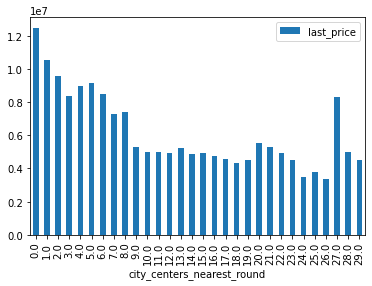

In [58]:
pivot_centre.plot(kind='bar')

После 8-го километра идёт резкое снижение стоимости недвижимости, поэтому будем считать, что центром Санкт-Петербурга являются локации, которые на расстоянии от центра не более 8 километров.

### Изучение центра Санкт-Петербурга

In [59]:
#выделяем сегмент квартир в центре Спб
spb_centre_segment = clear_data.query('(locality_name == "Санкт-Петербург") and (city_centers_nearest_round <= 8)')

In [60]:
#проверим количество строк в нашей выборке
len(spb_centre_segment)

3942

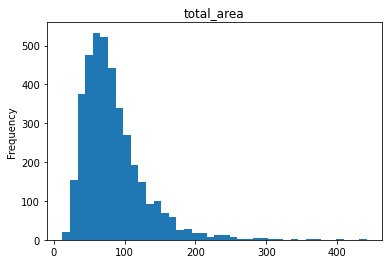

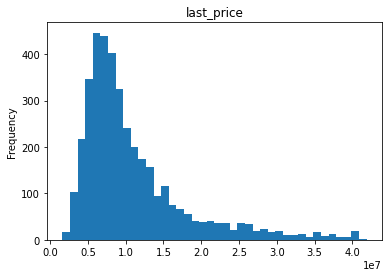

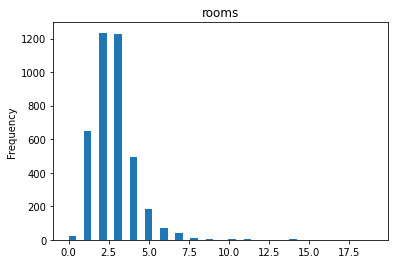

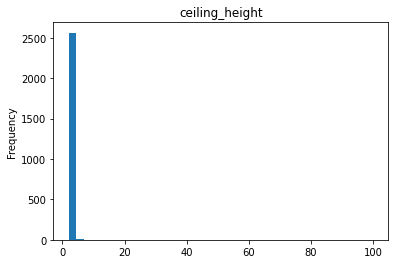

In [61]:
for value in ('total_area', 'last_price', 'rooms', 'ceiling_height'):
    spb_centre_segment[value].plot(kind='hist', title = value, bins = 40)
    plt.show()

Пик площади квартир приходится на 70-80 метров (в отличие от 40 метров в основном датасете).

Пик цены — на 7-8 миллионов (в отличие от 4 миллионов в основном датасете).

Продажи однокомнатных квартир значительно меньше, чем двух- и трёхкомнатных (в основном датасете большой пик в однокомнатных квартирах).

Пик высоты потолков — больше 3 метров (в основном датасете 2.4-2.8).

Это говорит о том, что квартиры в центре Петербурга в основном больше по площади (и соответтсвенно — по количеству комнат), дороже и имеют более высокие потолки.

In [62]:
#создадим датафрейм, по которому мы будем считать корреляции
corr_spb = spb_centre_segment[['last_price', 'rooms', 'city_centers_nearest', 'total_area']]

In [63]:
print(corr_spb.corr())

                      last_price     rooms  city_centers_nearest  total_area
last_price              1.000000  0.478317             -0.105826    0.731751
rooms                   0.478317  1.000000             -0.214158    0.798605
city_centers_nearest   -0.105826 -0.214158              1.000000   -0.167790
total_area              0.731751  0.798605             -0.167790    1.000000


Корреляция между этими параметрами в центре Санкт-Петербурга похожа на корреляции из общего датасета, однако корелляция стоимости к близости к центру слабее выражена.

<AxesSubplot:title={'center':'Зависимость цены от месяца'}>

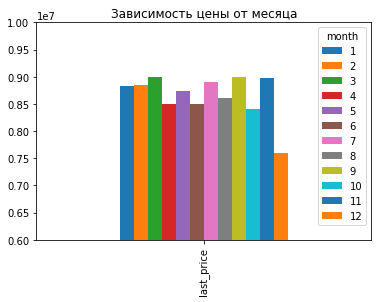

In [64]:
#создаём сводную таблицу с медианными значениями цены по каждому месяцу
pivot_month_spb = spb_centre_segment.pivot_table(columns='month', values='last_price', aggfunc='median')
pivot_month_spb.plot(ylim=(6000000,10000000), kind='bar', legend=True, title='Зависимость цены от месяца')

<AxesSubplot:title={'center':'Зависимость цены от года'}>

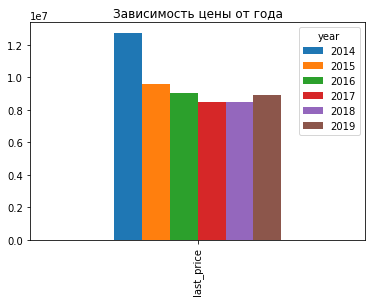

In [65]:
pivot_year_spb = spb_centre_segment.pivot_table(columns='year', values='last_price', aggfunc='median')
pivot_year_spb.plot(kind='bar', title='Зависимость цены от года')

В отличие от общих данных, цены на квартиры в центре Санкт-Петербурга практически не изменяются из года в год и из месяца в месяц. Тренда на падение цены с 2014 года тоже нет.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}>

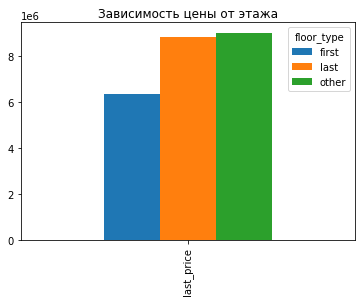

In [66]:
pivot_floor_spb = spb_centre_segment.pivot_table(columns='floor_type', values='last_price', aggfunc='median')
pivot_floor_spb.plot(kind='bar', title='Зависимость цены от этажа')

Различия в стоимости квартир на разных этажах остаётся примерно теми же, но квартиры на последнем этаже в центре Санкт-Петербурга ценятся выше.

### Исследовательский анализ: вывод

Мы изучили взаимосвязи и характеристики как общего датасета, так и его среза — центра Санкт-Петербурга.

Также на этом шаге мы определили населённые пункты с наибольшим количеством проданных объектов недвижимости и самой большой стоимостью недвижимости. 

Изучив типичное время продаж квартиры мы определили, какое время продажи является очень быстрым, а какое слишком медленным.

Мы выяснили, что в датасете было много выбивающихся значений, из-за которых было невозможно оценить различия в даннных и избавились от них.

## Общий вывод

В ходе этого исследования мы проанализировали данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 гг., чтобы определить, какие факторы влияют на рыночную стоимость недвижимости.

Мы предобработали полученные данные, создали новые столбцы с рассчётами и категориями, проанализировали параметры сделок и влияние факторов на стоимость квартиры.

Главным выводом исследования стал факт сильной корреляции цены квартиры и её площади и количества комнат, и совсем небольшой корреляции между ценой и другими факторами, а также некоторые отличия в изменении цен на квартиры в зависимости от их расположения.

Мы изучили разницу между параметрами квартир во всём датасете и его срезе — квартирах в центре Санкт-Петербурга — и выяснили, что хотя корреляция между площадью/количество комнат и ценой квартиры остаётся сильной, на цены квартир в центре города меньше влияет год или месяц продажи. Также, мы заметили различия в характеристиках квартир в центре Петербурга в отличие от остальных квартир Ленинградской области.

В дальнейшем, мы можем разработать разбивку квартир на определенные категории в зависимости от их параметров, чтобы точнее определять их потенциальную стоимость.